## Predict syllable usage from age, size, and reconstructed size

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from aging.plotting import figure, format_plots
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

In [43]:
format_plots()

In [4]:
def get_size():
    df = pd.read_parquet(
        "/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_syllable_df_v00.parquet"
    )
    # TODO: compute area only on frames where the velocity AND height are below a certain value
    sizes = df.groupby(["subject_name", "session_name", "uuid", "date"])[["area_px", "recon_area"]].median()
    return sizes

In [2]:
ont_usage_mtx = pd.read_parquet("/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_clean_v2.parquet")

In [5]:
mouse_sizes = get_size()

In [11]:
age = pd.Series(
    ont_usage_mtx.index.get_level_values("age"),
    index=ont_usage_mtx.index.droplevel(level=[0, -1]),
)

mouse_sizes["age"] = age

In [18]:
mouse_sizes = mouse_sizes.dropna()

In [19]:
syllable_fits = ont_usage_mtx.droplevel(level=[0, -1])

In [47]:
scaler = StandardScaler()
coefs = {}
for syllable in range(50):
    # reg = LinearRegression()
    reg = Lasso(alpha=0.075)
    reg.fit(scaler.fit_transform(mouse_sizes), scaler.fit_transform(syllable_fits.loc[mouse_sizes.index, [syllable]]))
    coefs[syllable] = reg.coef_.squeeze()
arr = pd.DataFrame(np.array(list(coefs.values())), columns=["area_px", "recon_area", "age"])

<Axes: >

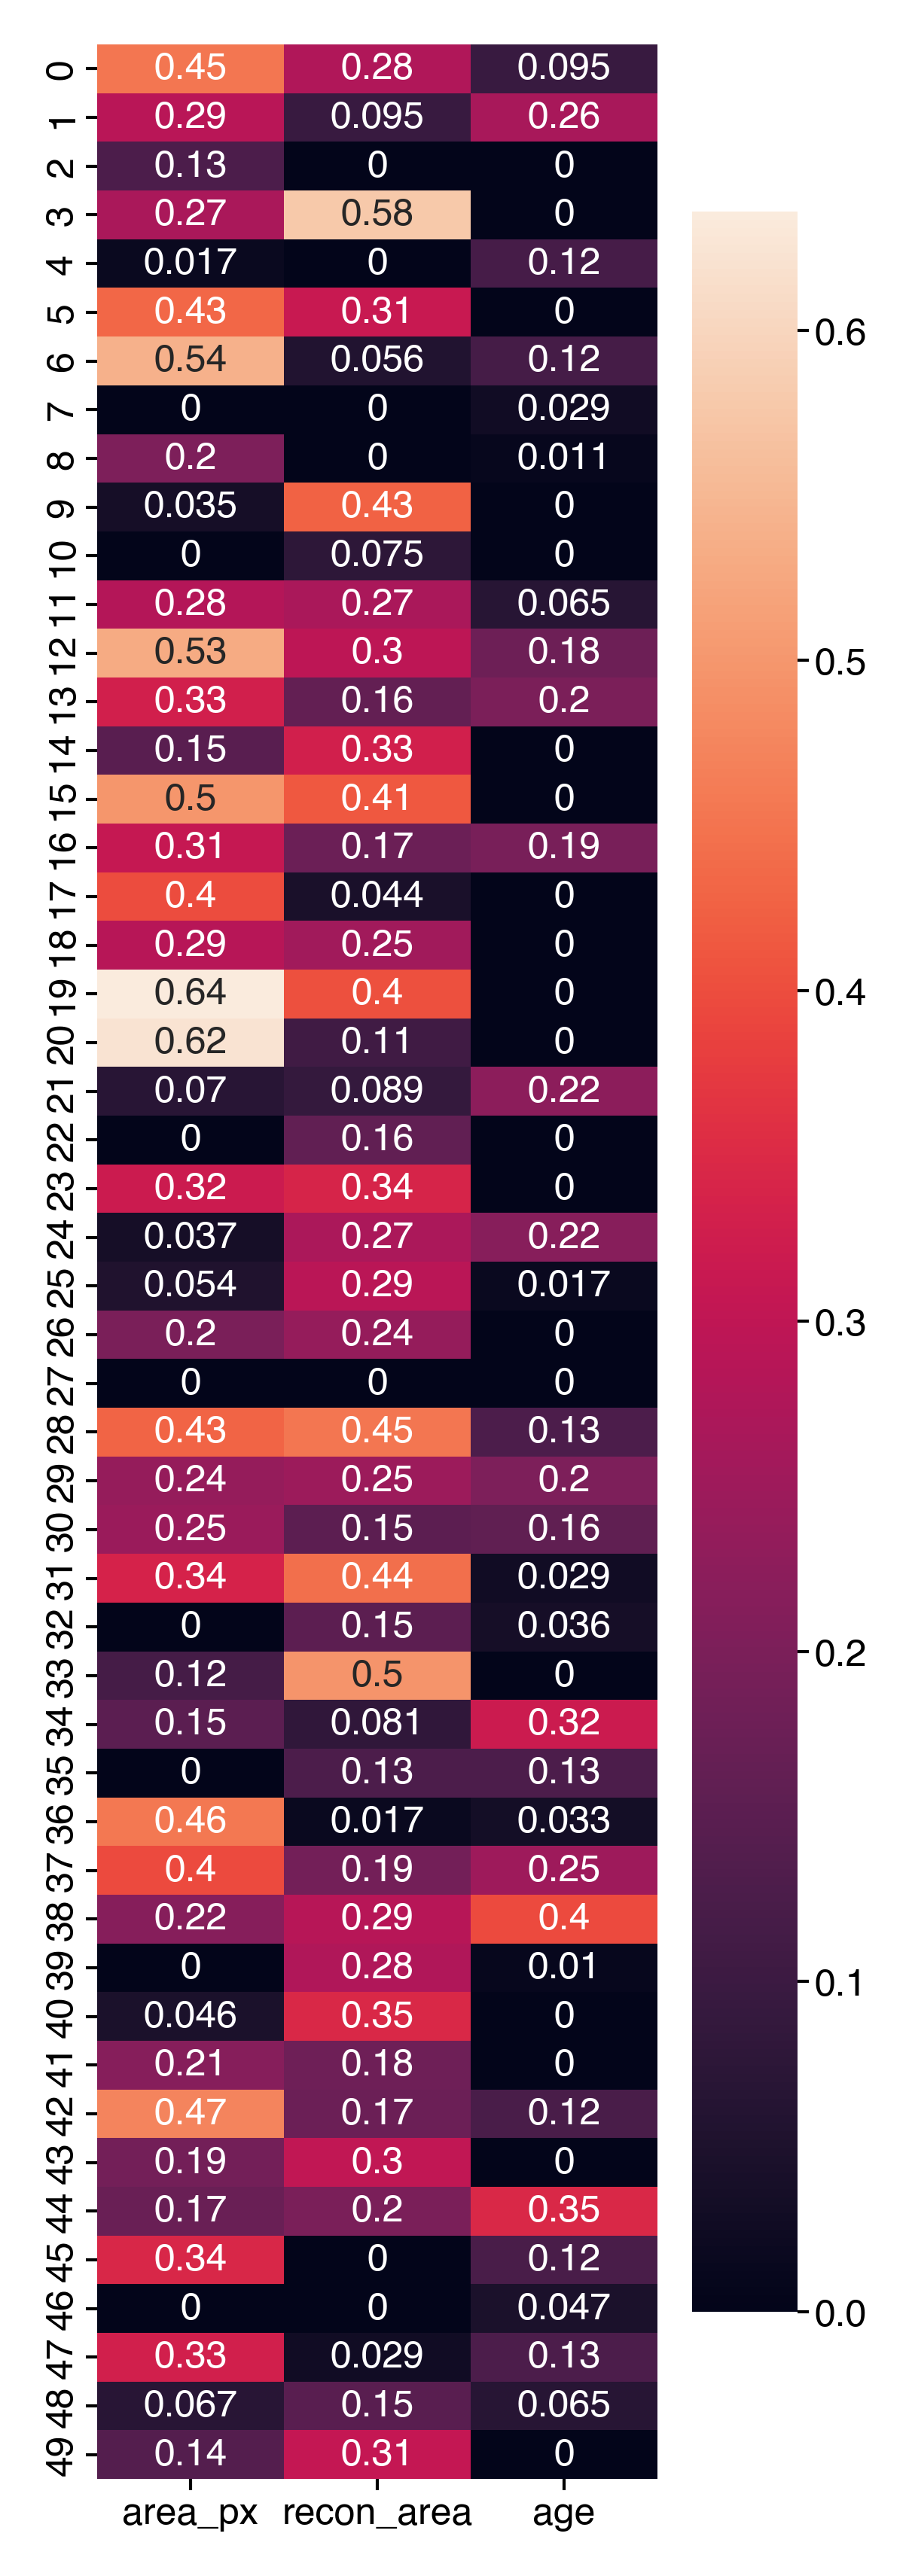

In [48]:
fig = figure(2, 7)
sns.heatmap(arr.abs(), annot=True)

In [51]:
arr.idxmax(axis=1).value_counts()

recon_area    24
area_px       22
age            4
Name: count, dtype: int64